In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

import sklearn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
(train_images, train_labels), (test_images, test_labels) =  keras.datasets.mnist.load_data()
print (train_images.shape, test_images.shape)
print (train_labels.max(), test_labels.min())

(60000, 28, 28) (10000, 28, 28)
9 0


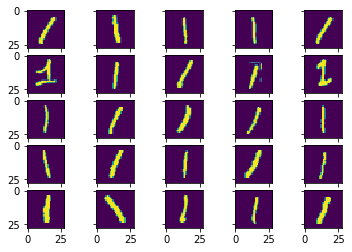

In [0]:
# 创建画布
fig, ax = plt.subplots(nrows = 5, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(25):
  img = train_images[train_labels == 1][i].reshape(28,28)
  ax[i].imshow(img)

In [0]:
three = train_images[train_labels == 3][:500]
six = train_images[train_labels == 6][:500]
eight = train_images[train_labels == 8][:500]
data = np.vstack([three,six,eight])
data = data.reshape(1500,784)

# PCA Embedding

In [0]:
from scipy import linalg
# A = USV^T U = U S = np.diag(s) v = V^T
U, s, v = linalg.svd(data, full_matrices = False)
load_vector = v.transpose()[:,0:3]
load_vector.shape

((784, 3), (1500, 784), (784,), (784, 784))

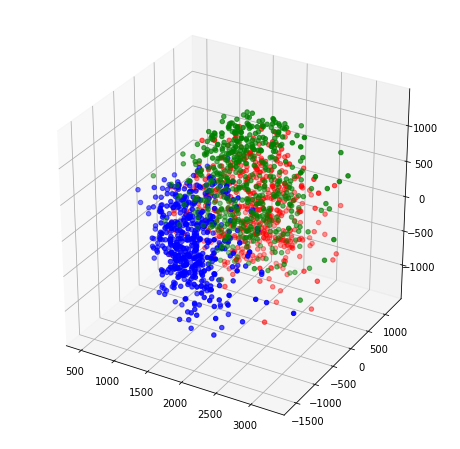

In [0]:
projection = data.dot(load_vector)

fig = plt.figure(figsize = (8, 8))
C = ['r' for i in range(500)] + ['b' for i in range(500)] + ['g' for i in range(500)]

x = fig.add_subplot(111,projection='3d')
x.scatter(projection[:,0], projection[:,1], projection[:,2], c=C)

# Kernel Embedding

In [0]:
from scipy.spatial.distance import pdist, squareform
import scipy
pairwise_sq_dists = squareform(pdist(data, 'sqeuclidean'))

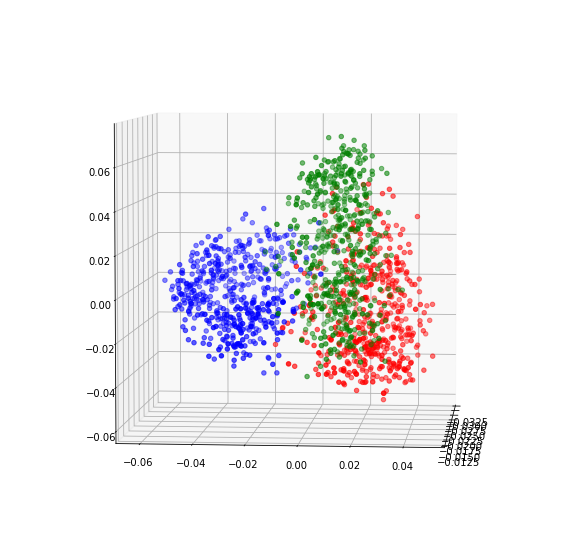

In [0]:
s = 2500
K = scipy.exp(-pairwise_sq_dists/s ** 2)
w, v = linalg.eigh(K)
p=v

X, Y, Z = v[:, 1499], v[:, 1498], v[:, 1497]

fig2 = plt.figure(figsize = (10,10))
x2 = fig2.add_subplot(111, projection = '3d',elev=5, azim=5)

x2.scatter(X,Y,Z,c=C)

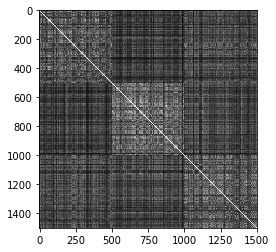

In [0]:
fig3, ax = plt.subplots()
ax.imshow(K, cmap='gray')

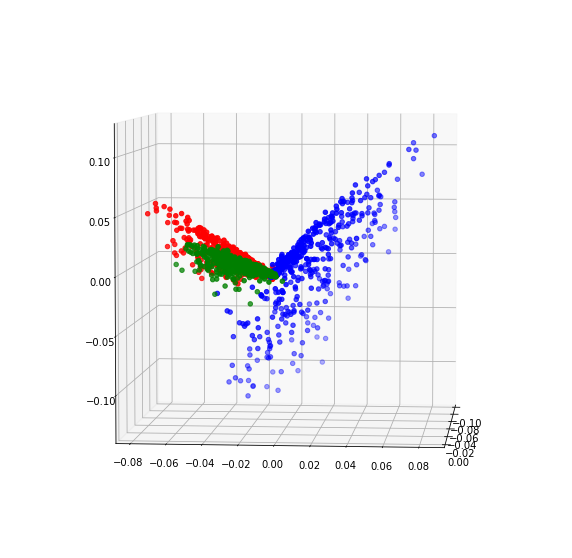

In [0]:
s = 1000
K = scipy.exp(-pairwise_sq_dists/s ** 2)
w, v = linalg.eigh(K)
p=v

X, Y, Z = v[:, 1499], v[:, 1498], v[:, 1497]

fig2 = plt.figure(figsize = (10,10))
x2 = fig2.add_subplot(111, projection = '3d',elev=5, azim=5)

x2.scatter(X,Y,Z,c=C)

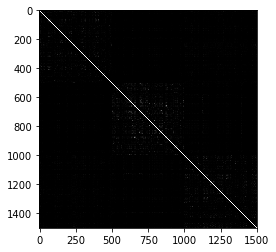

In [0]:
fig3, ax = plt.subplots()
ax.imshow(K, cmap='gray')

# Spectral Clustering

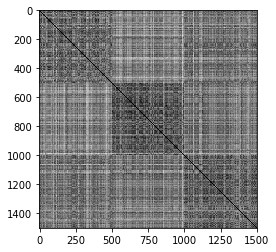

In [0]:
fig3, ax = plt.subplots()
ax.imshow(pairwise_sq_dists, cmap='gray')

In [0]:
k = 130
knn_graph = np.zeros(pairwise_sq_dists.shape)

for i, row in enumerate(K):
  k_largest = np.argsort(row)[-k:]
  for entry in k_largest:
    knn_graph[i, entry] = row[entry]

In [0]:
D = np.zeros_like(knn_graph)

for i, row in enumerate(D):
  row[i] = np.sum(knn_graph[i])

In [0]:
# L = D -knn_graph
L = np.identity(len(knn_graph)) - np.sqrt(1/(D+1)) * knn_graph * np.sqrt(1/(D+1))

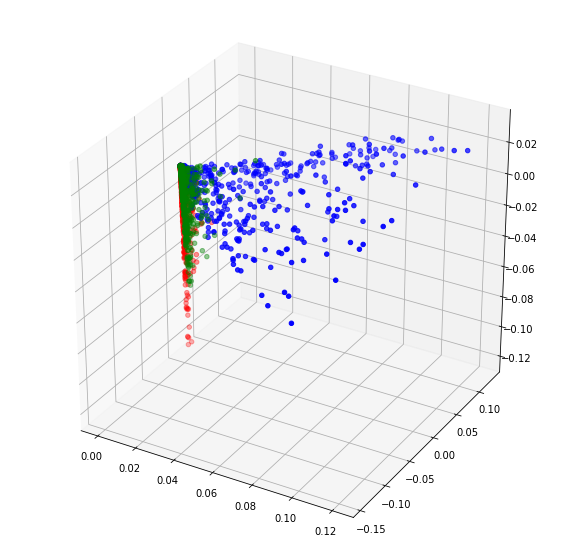

In [0]:
w, v = linalg.eigh(L)

v = v[:,[0,1,2]]
fig4 = plt.figure(figsize=(10,10))
x4 = fig4.add_subplot(111,projection = '3d')
x4.scatter(v[:,0], v[:,1], v[:,2], c=C)